### **ƯU ĐIỂM VÀ NHƯỢC ĐIỂM CỦA CANNY EDGE DECTECTOR. CÁC ỨNG DỤNG THỰC TẾ CỦA CANNY EDGE DETECTOR**

# Ưu điểm của Canny Edge Detector

Độ chính xác cao: Phát hiện biên rõ ràng, mảnh (thin edges) và liên tục.

Giảm nhiễu tốt: Sử dụng bộ lọc Gaussian giúp hạn chế nhiễu trước khi tìm biên.

Định vị biên chính xác: Áp dụng Non-Maximum Suppression để giữ lại vị trí biên đúng nhất.

Giảm biên giả: Cơ chế double threshold + hysteresis giúp loại bỏ biên yếu không quan trọng.

# Nhược điểm của Canny Edge Detector

Tốc độ chậm hơn so với Sobel, Prewitt do nhiều bước xử lý.

Phụ thuộc tham số (σ của Gaussian, threshold thấp/cao).

Không phù hợp thời gian thực nếu không tối ưu hoặc chạy trên phần cứng yếu.

Khó tinh chỉnh cho các ảnh có điều kiện ánh sáng phức tạp.

## a - So sánh với các thuật toán khác về độ chính xác, tốc độ, khả năng xử lý nhiễu.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
img = cv2.imread(r"D:\anh_mau.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

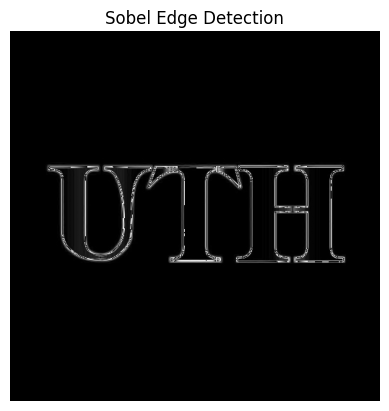

In [3]:
# Sobel Edge Detector
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sobel = np.sqrt(sobel_x**2 + sobel_y**2)
sobel = np.uint8(sobel)

plt.imshow(sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

### Nhận xét về Sobel Edge Detector
- Phát hiện được biên theo hai hướng ngang và dọc.
- Biên thu được khá rõ nhưng còn **dày**.
- Vẫn xuất hiện **nhiễu**, đặc biệt ở các vùng có texture phức tạp.
- Tốc độ xử lý nhanh, phù hợp với các ứng dụng thời gian thực đơn giản.
- Không hiệu quả khi ảnh bị nhiễu mạnh.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

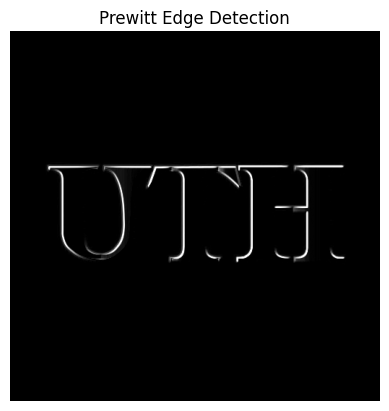

In [4]:
# Prewitt Edge Detector
kernelx = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

kernely = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])

prewitt_x = cv2.filter2D(gray, -1, kernelx)
prewitt_y = cv2.filter2D(gray, -1, kernely)

prewitt = cv2.add(prewitt_x, prewitt_y)

plt.imshow(prewitt, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

### Nhận xét về Prewitt Edge Detector
- Thuật toán đơn giản, dễ cài đặt.
- Biên thu được **mờ và kém rõ ràng**.
- Rất **nhạy với nhiễu**, dễ phát hiện biên giả.
- Chất lượng biên thấp hơn Sobel và Canny.
- Chủ yếu dùng cho mục đích học tập và minh họa.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

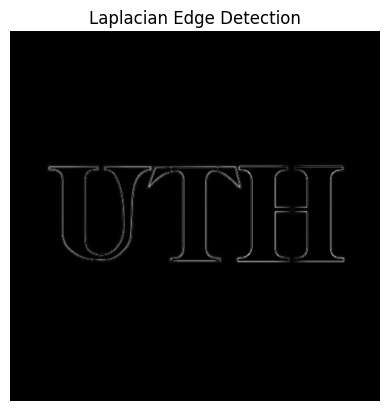

In [5]:
# Laplacian Edge Detector
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

### Nhận xét về Laplacian Edge Detector
- Phát hiện biên dựa trên đạo hàm bậc hai.
- Xác định được nhiều biên nhưng **nhiễu rất mạnh**.
- Không xác định được hướng của biên.
- Biên dễ bị **đứt đoạn** và không ổn định.
- Cần kết hợp làm mượt ảnh trước khi sử dụng để giảm nhiễu.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

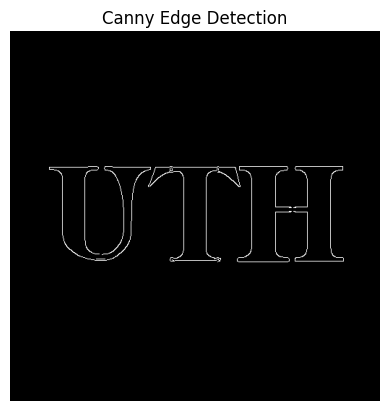

In [6]:
# Canny Edge Detector
canny = cv2.Canny(gray, threshold1=100, threshold2=200)

plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

### Nhận xét về Canny Edge Detector
- Cho chất lượng phát hiện biên **tốt nhất** trong các thuật toán đã thử nghiệm.
- Biên thu được **mảnh, rõ ràng và liên tục**.
- Khả năng **lọc nhiễu rất tốt** nhờ sử dụng Gaussian smoothing.
- Định vị biên chính xác, ít biên giả.
- Thời gian xử lý chậm hơn Sobel và Prewitt do nhiều bước xử lý.
- Phù hợp với các bài toán yêu cầu độ chính xác cao.

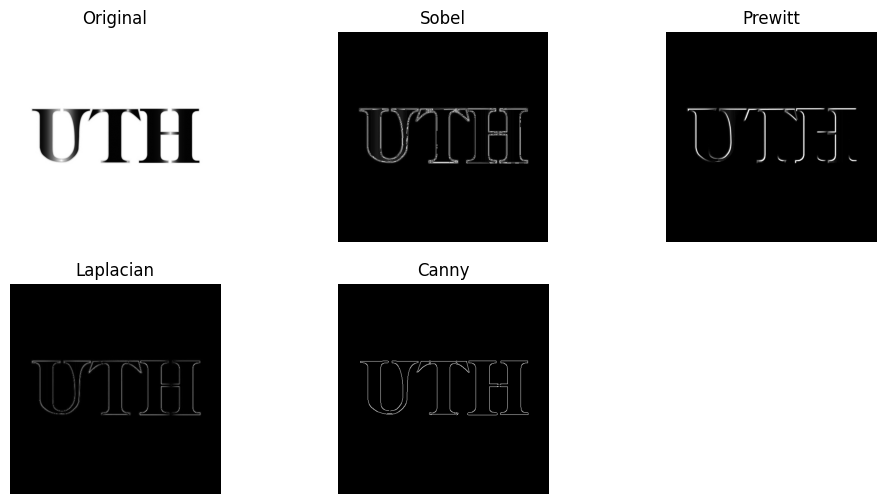

In [7]:
titles = ['Original', 'Sobel', 'Prewitt', 'Laplacian', 'Canny']
images = [gray, sobel, prewitt, laplacian, canny]

plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


### Tổng hợp:
- Prewitt và Sobel có tốc độ nhanh nhưng chất lượng biên chưa cao.
- Laplacian phát hiện được nhiều biên nhưng rất nhạy với nhiễu.
- Canny Edge Detector cho kết quả vượt trội về độ chính xác và khả năng xử lý nhiễu.
⇒ Canny là lựa chọn phù hợp nhất khi chất lượng biên là yếu tố quan trọng.


# b - Trong lĩnh vực nào Canny được sử dụng phổ biến nhất?
## Lĩnh vực Canny Edge Detector được sử dụng phổ biến nhất

Canny được dùng rộng rãi trong các lĩnh vực:

- Xử lý ảnh và thị giác máy tính

- Nhận dạng đối tượng (Object Detection)

- Thị giác robot (Robotics Vision)

- Xử lý ảnh y tế

- Xe tự hành & giao thông thông minh

- Nhận dạng chữ viết và ký tự (OCR)

-> Phổ biến nhất: Computer Vision & Image Processing

# c - Ví dụ cụ thể về các ứng dụng.
1. Nhận dạng làn đường (Lane Detection)

- Phát hiện biên vạch kẻ đường trong hệ thống xe tự lái.
- Kết hợp với Hough Transform để tìm đường thẳng.

2. Xử lý ảnh y tế

- Phát hiện ranh giới khối u, xương trong ảnh X-quang, MRI, CT.
- Hỗ trợ bác sĩ chẩn đoán chính xác hơn.

3. Nhận dạng khuôn mặt

- Xác định đường viền mắt, mũi, miệng.
- Tiền xử lý cho các mô hình học sâu.

4. Nhận dạng biển số xe

- Tách biên biển số trước khi OCR.
- Hoạt động tốt trong môi trường nhiều nhiễu.

5. Phân tích ảnh vệ tinh

- Phát hiện đường xá, sông ngòi, ranh giới địa hình.